In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style="whitegrid")
import os 
import glob as gb
import cv2 
import tensorflow as tf
import keras 

import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
trainpath = "drive/My Drive/03/dataset/DATA/"


for folder in os.listdir(trainpath):
    files = gb.glob(pathname= str(trainpath +folder+'/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')



For training data, found 184 in folder volkswagen tiguan
For training data, found 150 in folder toyota corolla
For training data, found 132 in folder polo
For training data, found 260 in folder sandero
For training data, found 100 in folder seat ibiza
For training data, found 158 in folder symbol
For training data, found 178 in folder picanto
For training data, found 84 in folder mercedes class a
For training data, found 156 in folder octavia
For training data, found 80 in folder nemo citroen
For training data, found 275 in folder duster
For training data, found 128 in folder hyundai tucson
For training data, found 280 in folder megane
For training data, found 160 in folder Golf
For training data, found 130 in folder hyundai i10
For training data, found 112 in folder logan
For training data, found 340 in folder clio
For training data, found 108 in folder chevrolet spark
For training data, found 129 in folder chevroulet aveo
For training data, found 80 in folder bmw serie 1


In [4]:
size=[]
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files:
        image= plt.imread(file)
        size.append(image.shape)
print(pd.Series(size).value_counts())# To know hom many pics in each size

(224, 224, 3)    3224
dtype: int64


In [5]:

code={'bmw serie 1':0,
'chevrolet spark':1,
'chevroulet aveo':2,
'clio':3,
'duster':4,
'Golf':5,
'hyundai i10':6,
'hyundai tucson':7,
'logan':8,
'megane':9,
'mercedes class a':10,
'nemo citroen':11,
'octavia':12,
'picanto':13,
'polo':14,
'sandero':15,
'seat ibiza':16,
'symbol':17,
'toyota corolla':18,
'volkswagen tiguan':19}

def getcode(n):
    for x,y in code.items():
        if n==y:
            return x


In [6]:
s=200
x_train=[]
y_train=[]
for folder in os.listdir(trainpath ):
    files=gb.glob(pathname=str(trainpath+folder+'/*.jpg'))
    for file in files:
        image=cv2.imread(file)
        image_array=cv2.resize(image,(s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder]) 
    
print(len(x_train))

3224


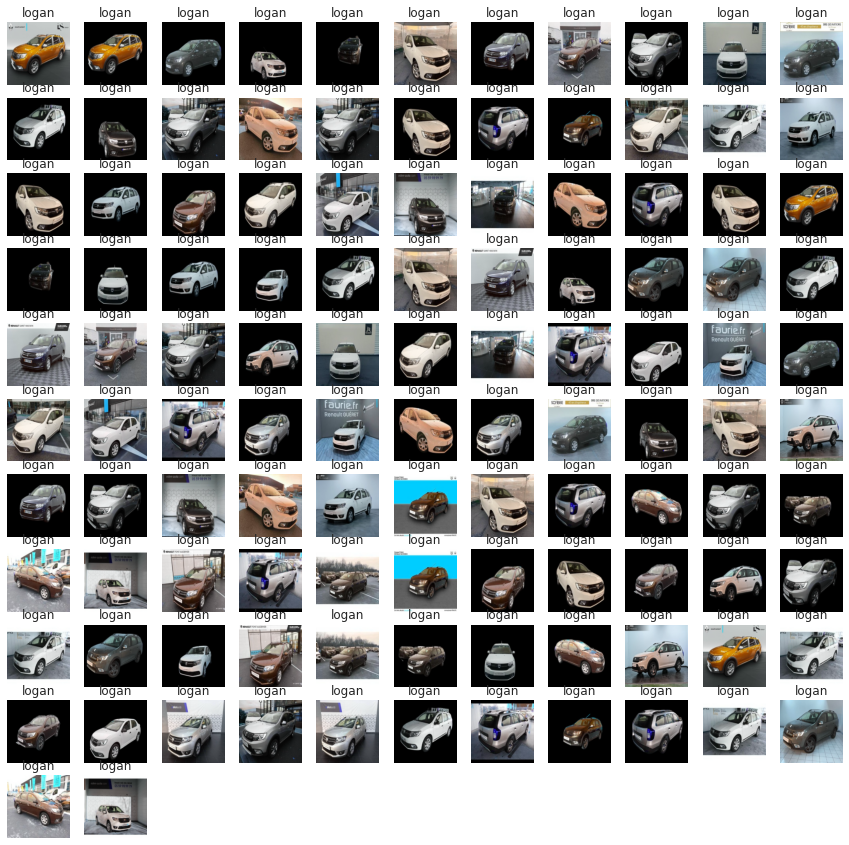

In [7]:
plt.figure(figsize=(15,15))
n=0
for i in range(len(x_train)):
    if (getcode(y_train[i])=='logan'):
        n=n+1
        plt.subplot(11,11,n)
        plt.imshow(x_train[i])
        plt.title(getcode(y_train[i]))
        plt.axis('off')

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.2)

In [12]:
print(f'we have {len(x_train)} items in x_train')
print(f'we have {len(x_test)} items in x_test')

we have 2579 items in x_train
we have 645 items in x_train


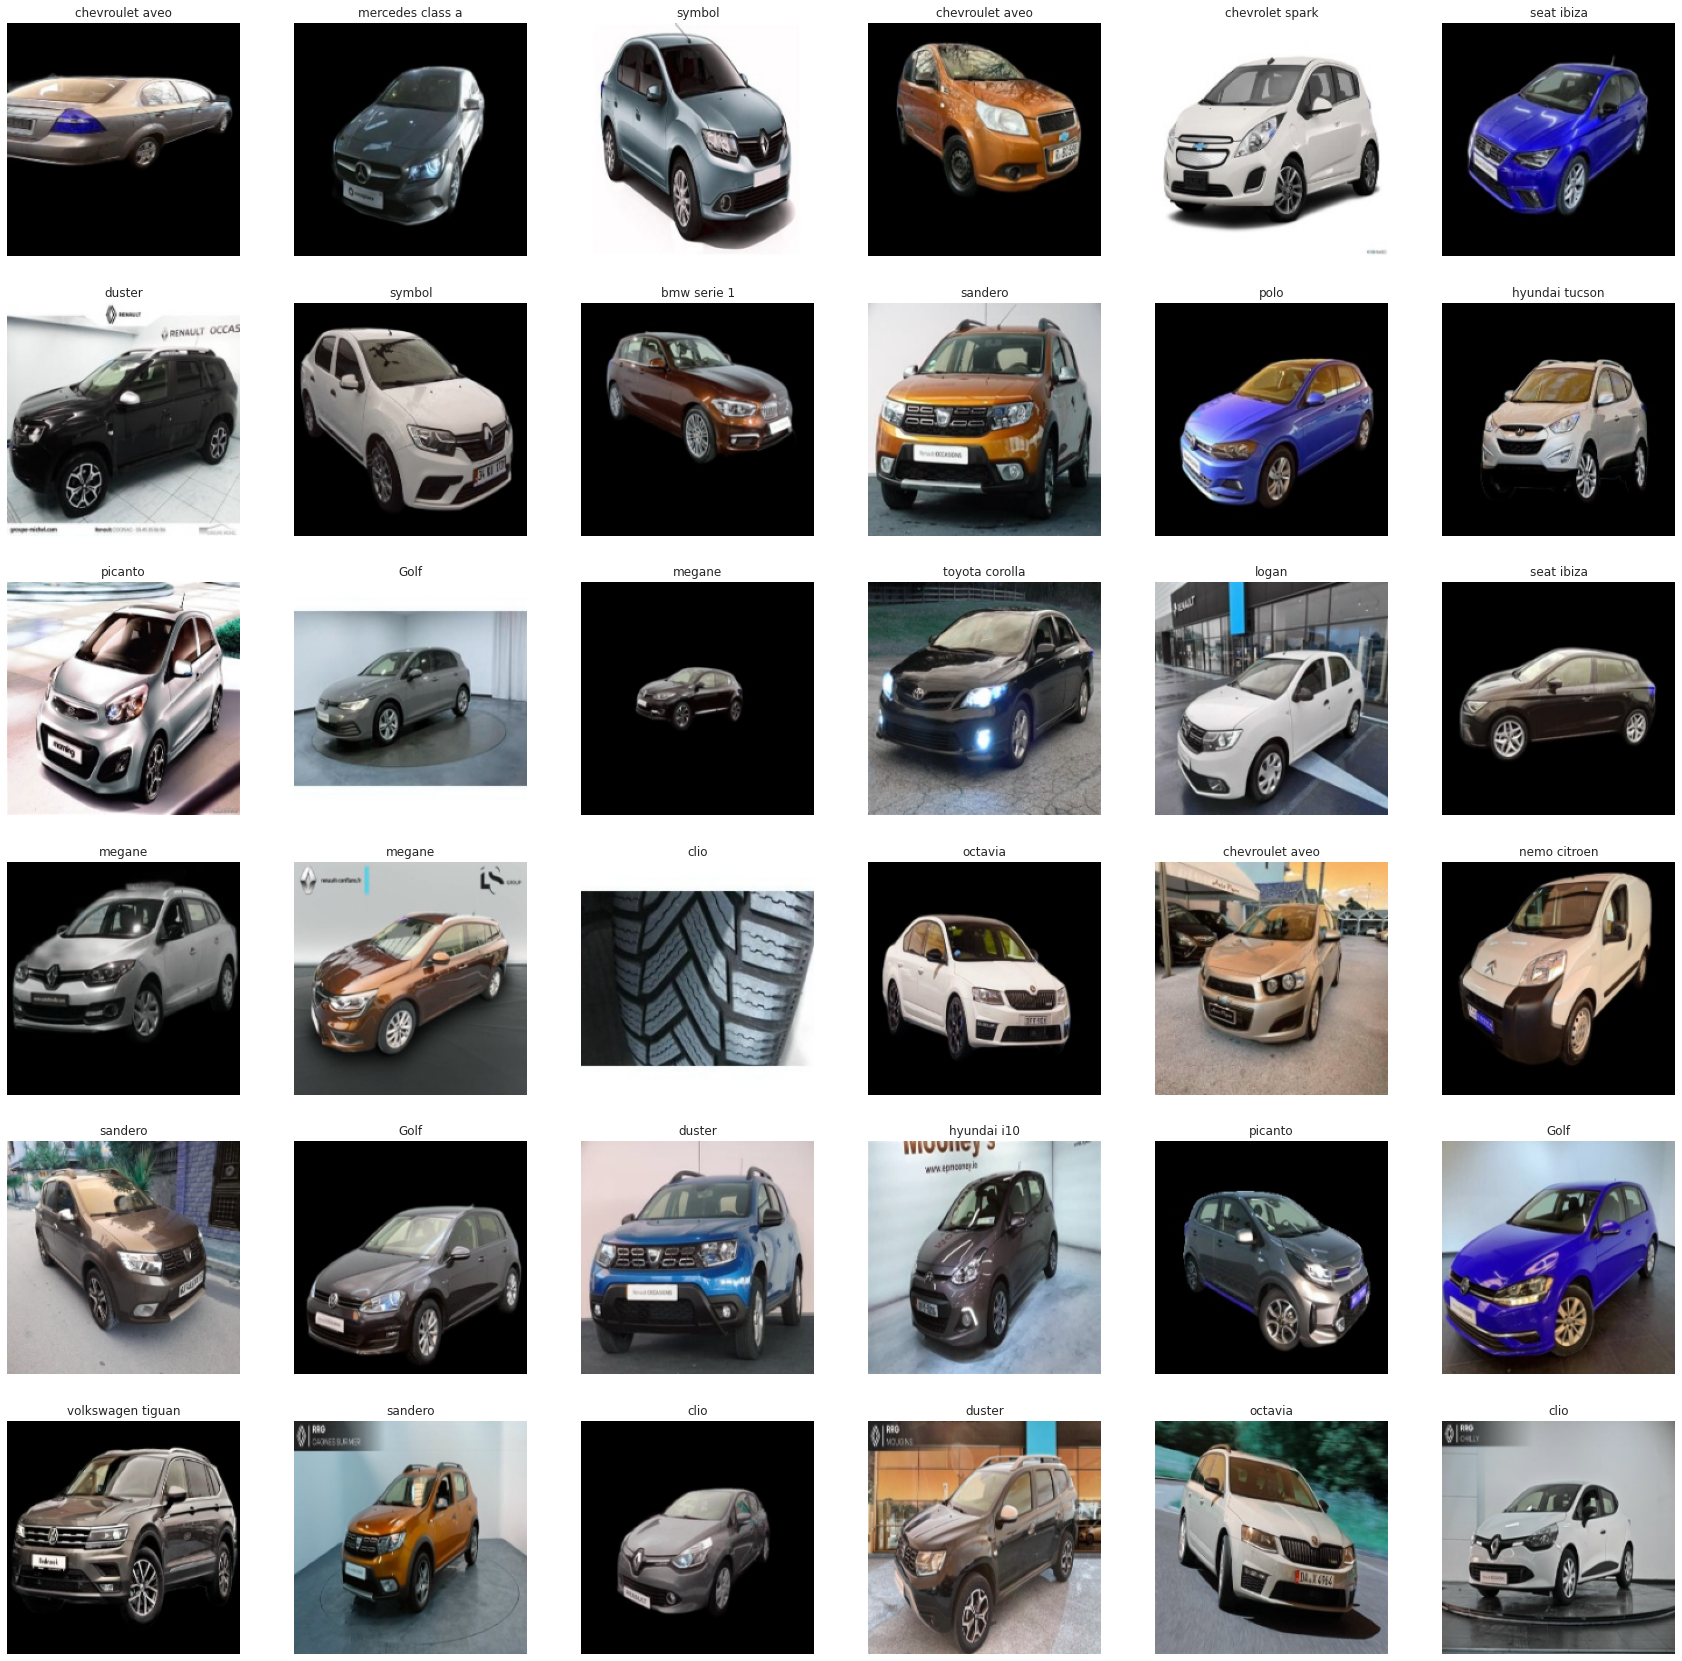

In [13]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

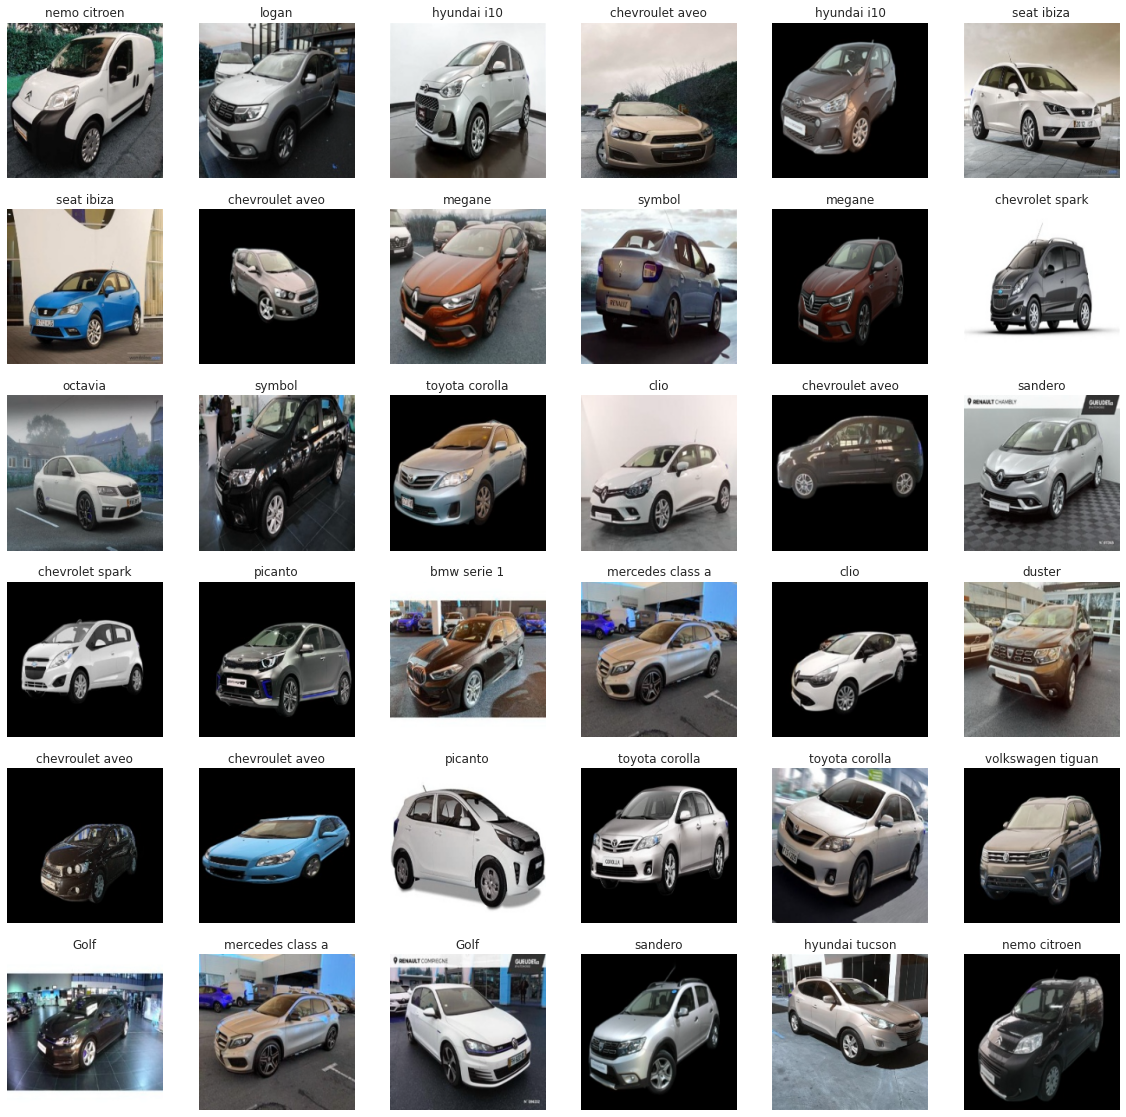

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

    Build The Model

In [15]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (2579, 200, 200, 3)
X_test shape  is (645, 200, 200, 3)
y_train shape  is (2579,)
y_test shape  is (645,)


In [48]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = EfficientNetB7(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(2048, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(20, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional EfficientNetB7 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# train the model on the new data for a few epochs
model.fit(x_train, y_train, epochs=8,batch_size=64,verbose=1)

Epoch 1/8
41/41 [==============================] - 44s 559ms/step - loss: 2.0213 - accuracy: 0.3831
Epoch 2/8
41/41 [==============================] - 23s 549ms/step - loss: 1.1179 - accuracy: 0.6704
Epoch 3/8
41/41 [==============================] - 22s 544ms/step - loss: 0.7686 - accuracy: 0.7635
Epoch 4/8
41/41 [==============================] - 23s 550ms/step - loss: 0.6237 - accuracy: 0.8147
Epoch 5/8
41/41 [==============================] - 23s 552ms/step - loss: 0.4662 - accuracy: 0.8577
Epoch 6/8
41/41 [==============================] - 22s 548ms/step - loss: 0.3945 - accuracy: 0.8813
Epoch 7/8
41/41 [==============================] - 23s 549ms/step - loss: 0.3078 - accuracy: 0.9128
Epoch 8/8
41/41 [==============================] - 23s 551ms/step - loss: 0.2880 - accuracy: 0.9178


In [49]:


ModelLoss, ModelAccuracy = model.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

21/21 [==============================] - 11s 276ms/step - loss: 0.5704 - accuracy: 0.8357
Test Loss is 0.5704346895217896
Test Accuracy is 0.8356589078903198


In [50]:
y_pred = model.predict(x_test)

print('Prediction Shape is {}'.format(y_pred.shape))

21/21 [==============================] - 12s 278ms/step
Prediction Shape is (645, 20)


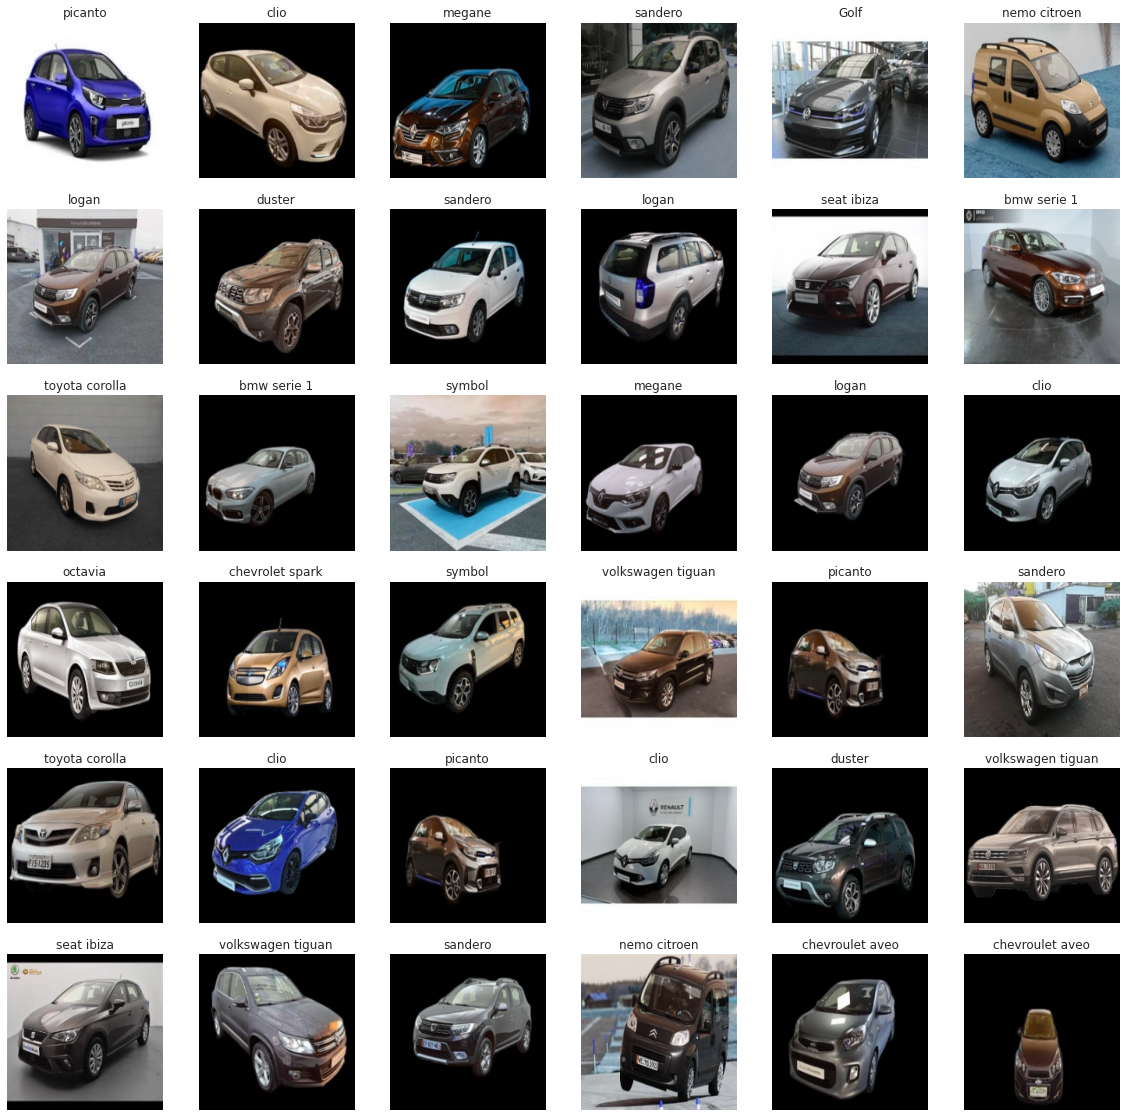

In [51]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])
    plt.title(getcode(np.argmax(y_pred[i])))    
    plt.axis('off')